In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
CHOSEN = 4

In [3]:
new_model = tf.keras.models.load_model('./Models/m90_n90_s120_i150_l1600k/my_model')

In [4]:
train_mean = pd.Series({'Outer Temp.':25.103154,'Initial Inner Temp.':69.712887,'Outer Ws':9.888763,'Inner Temp.':55.491773})
train_std = pd.Series({'Outer Temp.':2.866545,'Initial Inner Temp.':5.794157,'Outer Ws':5.807717,'Inner Temp.':5.437240})



In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
tf.test.is_built_with_gpu_support()

True

In [7]:
PREV_SIZE = 90
SIZE = 90

In [8]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [9]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [10]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [11]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = self.test
  self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [12]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [13]:
#HERE

In [14]:
#new_model = tf.keras.models.load_model('m60_n90_s64_i100_l00k/my_model')
#new_model = tf.keras.models.load_model('double_model_no_random/my_model')
#new_model = tf.keras.models.load_model('model_60_24_con_sep100_800k_90_mae_2/my_model_noreg')

In [15]:
#TEST 1* : 'training_cases_twov_90_escalon_t_int_2.csv'
#TEST 1 'training_cases_twov_90_text_w16.csv'
#TEST 2: 'training_cases_twov_90_text_w5.csv'

In [16]:
#df2 = pd.read_csv('training_cases_twov_90_escalon_t_int_2.csv',header=0, index_col=0, sep = ';')
#df2 = pd.read_csv('training_cases_twov_90_text_w16.csv',header=0, index_col=0, sep = ';')
#df2 = pd.read_csv('training_cases_twov_90_text_w5.csv',header=0, index_col=0, sep = ';')
#df2 = pd.read_csv('training_cases_twov_90_escalon_t_int_4_ctr-10_1.csv',header=0, index_col=0, sep = ';')


In [17]:
df_list = []

In [18]:
df_list.append(pd.read_csv('./Tests/ZTEST1training_cases_twov_90_text_w16.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST2training_cases_twov_90_text_w5.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST3training_cases_twov_90_tint_68_w8_22.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST4training_cases_twov_90_tint_73_w11_26.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST5training_cases_twov_90_text_24_27_cambiow_9_6.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST6training_cases_twov_90_tint_73_70_cambiow_15_11.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST7training_cases_twov_90_text_21_23_tint_74_69_w10.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Tests/ZTEST8training_cases_twov_90_text_26_24_tint_71_66_w_3_5.csv',header=0, index_col=0, sep = ';'))

In [19]:
chosen_df = CHOSEN -1
df2 = df_list[chosen_df]

In [20]:
#zeros_df = pd.DataFrame(0, index=range(SIZE), columns=df2.columns)
zeros_df = pd.DataFrame(0, index=range(SIZE-2), columns=df2.columns)
df2 = pd.concat([zeros_df,df2],ignore_index=True)

In [21]:
df2['Outer Temp.'] = (df2['Outer Temp.'] - train_mean['Outer Temp.']) / train_std['Outer Temp.']
df2['Outer Ws'] = (df2['Outer Ws'] - train_mean['Outer Ws']) / train_std['Outer Ws']
df2['Initial Inner Temp.'] = (df2['Initial Inner Temp.'] - train_mean['Initial Inner Temp.']) / train_std['Initial Inner Temp.']
df2['Inner Temp.'] = (df2['Inner Temp.'] - train_mean['Inner Temp.']) / train_std['Inner Temp.']


In [22]:
dataset = df2[0:300]

In [23]:
def make_dataset(data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=PREV_SIZE,
      sequence_stride=1,
      shuffle=False,
      batch_size=120)

  return ds

ds = make_dataset(dataset)

ds

<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>

In [24]:
array = new_model.predict(ds)
array = array [:,:,0]

2/2 [==============================] - 1s 5ms/step


In [25]:
df = pd.DataFrame(array)
df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-2.057539,-2.083787,-2.095957,-2.105370,-2.119935,-2.139855,-2.153466,-2.173972,-2.163574,-2.175362,...,-0.588202,-0.576188,-0.574899,-0.587590,-0.541003,-0.554820,-0.548278,-0.543749,-0.523750,-0.522114
1,-2.197657,-2.203207,-2.227072,-2.257735,-2.296595,-2.331665,-2.348137,-2.348215,-2.304292,-2.250634,...,-1.345505,-1.346884,-1.357187,-1.368754,-1.341689,-1.349203,-1.352520,-1.347267,-1.342143,-1.345923
2,-1.523478,-1.527189,-1.526432,-1.527344,-1.520659,-1.509828,-1.494633,-1.462537,-1.409120,-1.346500,...,-0.873370,-0.879913,-0.898836,-0.905606,-0.888111,-0.901896,-0.906560,-0.902546,-0.908269,-0.913448
3,-1.023749,-1.085673,-1.119263,-1.127445,-1.102319,-1.056267,-1.001429,-0.925263,-0.838587,-0.746824,...,-0.583909,-0.602733,-0.631310,-0.637022,-0.634326,-0.649013,-0.666055,-0.661822,-0.680958,-0.697559
4,-0.807858,-0.885609,-0.932505,-0.941170,-0.905466,-0.843701,-0.777453,-0.685089,-0.589897,-0.491617,...,-0.615383,-0.637161,-0.667964,-0.667589,-0.668033,-0.679382,-0.698738,-0.689562,-0.714112,-0.733780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.063236,0.062253,0.062433,0.063224,0.062748,0.062441,0.061977,0.062813,0.062955,0.063233,...,0.064585,0.064455,0.064908,0.065271,0.064412,0.064388,0.063575,0.065015,0.063345,0.063782
207,0.062794,0.061715,0.061801,0.062507,0.061958,0.061591,0.061085,0.061899,0.062030,0.062317,...,0.065090,0.064959,0.065399,0.065762,0.064893,0.064867,0.064048,0.065489,0.063804,0.064241
208,0.062035,0.060881,0.060892,0.061538,0.060933,0.060526,0.059995,0.060812,0.060953,0.061271,...,0.064571,0.064440,0.064875,0.065240,0.064370,0.064351,0.063529,0.064975,0.063290,0.063728
209,0.060594,0.059362,0.059293,0.059883,0.059221,0.058778,0.058230,0.059062,0.059230,0.059589,...,0.062841,0.062712,0.063146,0.063512,0.062640,0.062631,0.061804,0.063256,0.061579,0.062016


In [26]:
data29 = df[SIZE-1]
data15 = df[int((SIZE/2)-1)]
new_column = ((data29.index) * 1)+PREV_SIZE + SIZE
new_column15 = ((data15.index) * 1)+PREV_SIZE + int(SIZE/2)

In [27]:
dataf = pd.DataFrame({'Time': new_column,'Value': data29})
dataf2 = pd.DataFrame({'Time': new_column15,'Value': data15})
#dataf = dataf.set_index('Time')
#dataf

In [28]:
df2 = df2.drop(columns=['Outer Temp.','Initial Inner Temp.','Outer Ws'])

In [29]:
df2

,Inner Temp.
0,-10.205872
1,-10.205872
2,-10.205872
3,-10.205872
4,-10.205872
...,...
483,0.065312
484,0.063785
485,0.062783
486,0.061789


In [30]:
dataf = dataf.set_index('Time')
dataf2 = dataf2.set_index('Time')

In [31]:
#plt.plot(dataf,'b')
#plt.plot(dataf2,'g')
#plt.plot(df2,'r')
#plt.xlim(50,300)
#plt.ylim(-1,1)

In [32]:
#df2 = df2[SIZE + PREV_SIZE:SIZE + PREV_SIZE+100]

In [33]:
dataf[:PREV_SIZE+SIZE]

,Value
Time,
180,-0.522114
181,-1.345923
182,-0.913448
183,-0.697559
184,-0.733780
...,...
355,0.060712
356,0.064028
357,0.063257


In [34]:
loss_array = tf.losses.MAE(df2['Inner Temp.'][SIZE + PREV_SIZE:SIZE + PREV_SIZE+100],dataf['Value'][:100]).numpy()
loss_array_2 = tf.losses.MAE(df2['Inner Temp.'][SIZE + PREV_SIZE:SIZE + PREV_SIZE+100],dataf2['Value'][int(SIZE/2):int(100+SIZE/2)]).numpy()

In [35]:
print(np.average(loss_array), np.average(loss_array_2))

0.36418468 0.030479383


In [36]:
predictions = df.iloc[SIZE]

In [37]:
times = (predictions.index)+PREV_SIZE + SIZE
predicted = pd.DataFrame({'Time':times,'Inner Temp.':predictions})
predicted = predicted.set_index('Time')

In [38]:
real = df2[SIZE+PREV_SIZE:2*SIZE+PREV_SIZE]

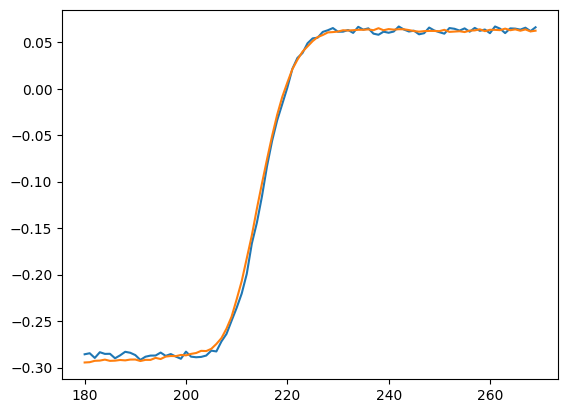

In [39]:
plt.plot(real)
plt.plot(predicted)

In [40]:
mae = np.absolute(np.subtract(real['Inner Temp.'], predicted['Inner Temp.'])).mean()
mae

0.004054684299396281